# 08. 다항회귀 실습

김보람  
2023-05-25

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 실습1

In [19]:

hard <- read.csv("hardwood.csv")
head(hard)


$y = β_0 + β_1x + ϵ$

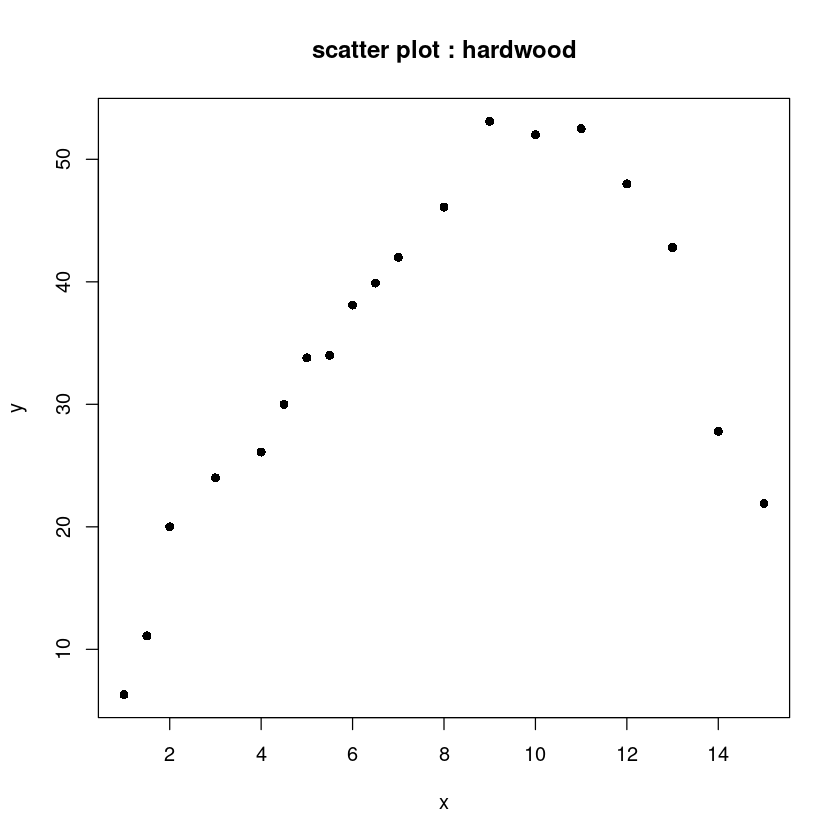

In [20]:
par(mfrow=c(1,1))
plot(y~x, hard, pch=16, main="scatter plot : hardwood")

$y = β_0 + β_1(x − \bar x) + ϵ$

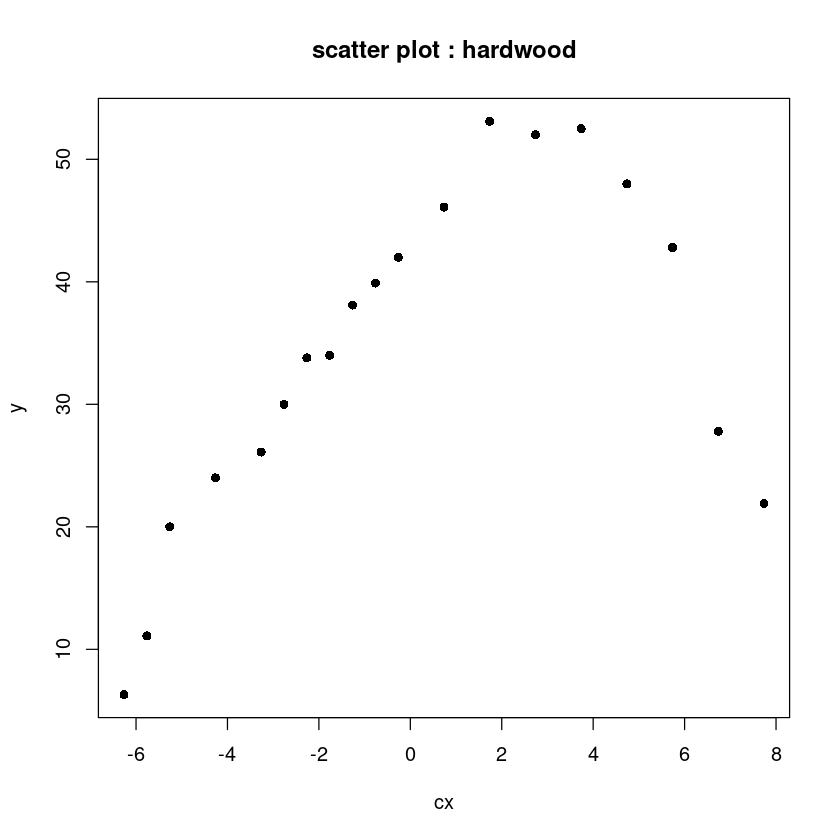

In [21]:
hard$cx <- hard$x - mean(hard$x)
plot(y~cx, hard, pch=16, main="scatter plot : hardwood")

In [22]:
hard_fit <- lm(y~x, hard)
summary(hard_fit)

$y= \beta_0+\beta_1x + \beta_2 x^2 + \epsilon$

In [23]:
hard_fit_2 <- lm(y~x+I(x^2), hard)
summary(hard_fit_2)

$y= \beta_0+\beta_1cx + \beta_2 cx^2 + \epsilon$

In [24]:
hard_fit_c_2 <- lm(y~cx+I(cx^2), hard)
summary(hard_fit_c_2)

-   모형의 적합도는 동일한 값이 나온다.

-   기울기가 조금 다르게 나온다.

-   $\beta_2$는 동일하게 나오지만, $\beta_0,\beta_1$이 조금 다르게
    나온다.

-   standard error가 좀 다르게 나온다.

In [25]:
print(paste0("corr(x, x^2) = ", round(cor(hard$x, hard$x^2),3)))

[1] "corr(x, x^2) = 0.97"

In [27]:
print(paste0("corr(cx, cx^2) = ", round(cor(hard$cx, hard$cx^2),3)))

[1] "corr(cx, cx^2) = 0.297"

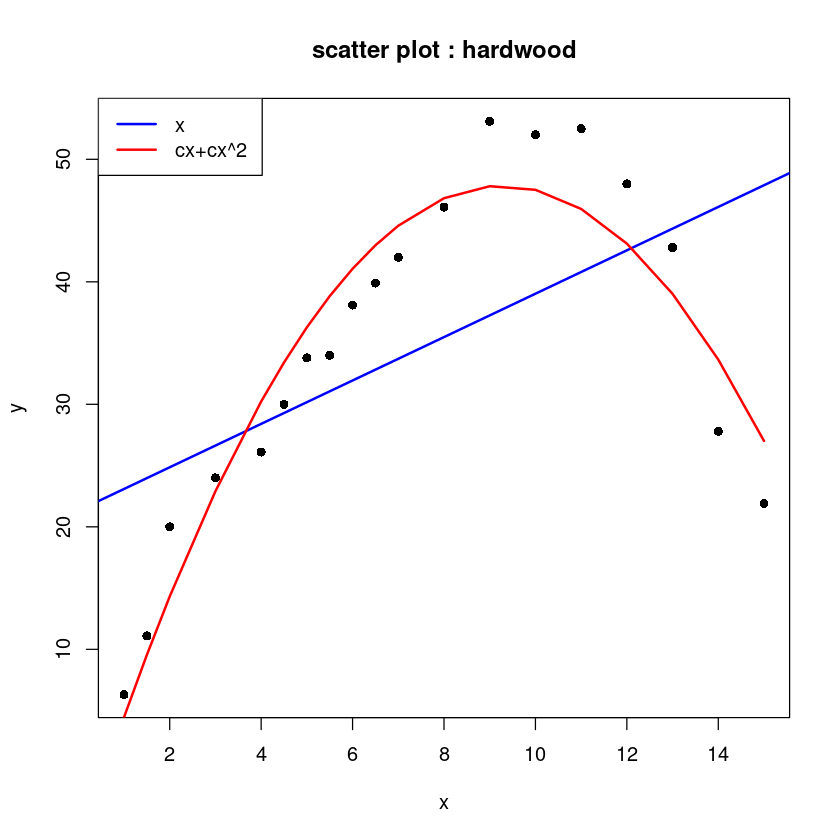

In [28]:
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
abline(hard_fit, col='blue', lwd=2)
lines(hard$x, fitted(hard_fit_c_2),col='red', lwd=2)
legend("topleft", c("x","cx+cx^2"), col=c('blue','red'), lwd=2, lty=1)

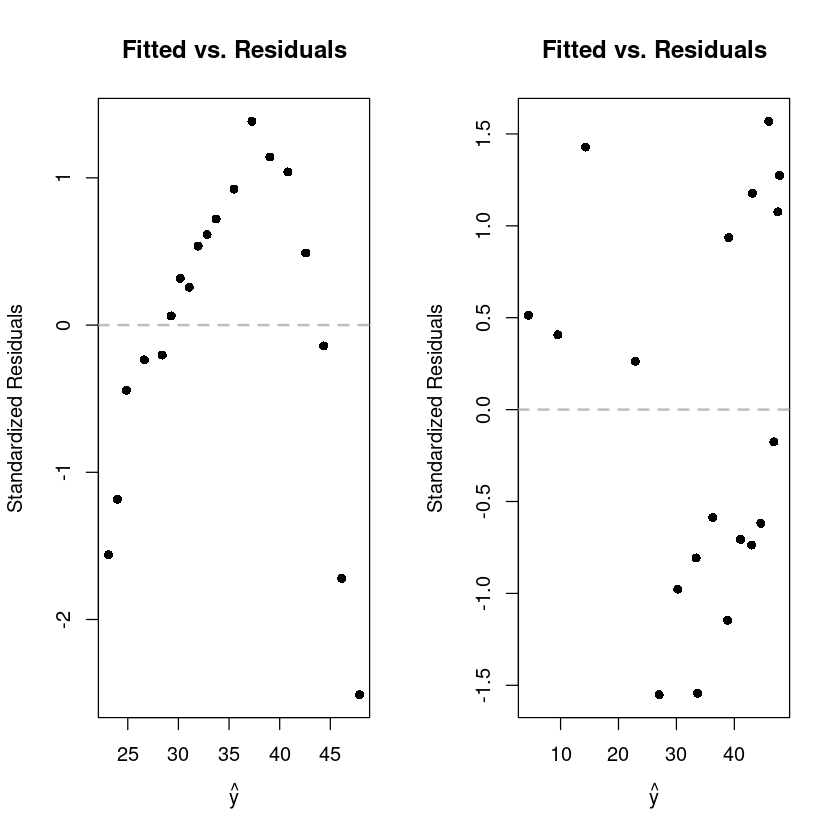

In [29]:
par(mfrow=c(1,2))
plot(fitted(hard_fit), rstandard(hard_fit), pch =16, 
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals", 
     main ="Fitted vs. Residuals")
abline(h =0, col ="grey", lwd =2, lty=2)

plot(fitted(hard_fit_c_2), rstandard(hard_fit_c_2), pch =16,
     xlab = expression(hat(y)),
     ylab = "Standardized Residuals",
     main = "Fitted vs. Residuals")
abline(h = 0, col ="grey", lwd =2, lty=2)

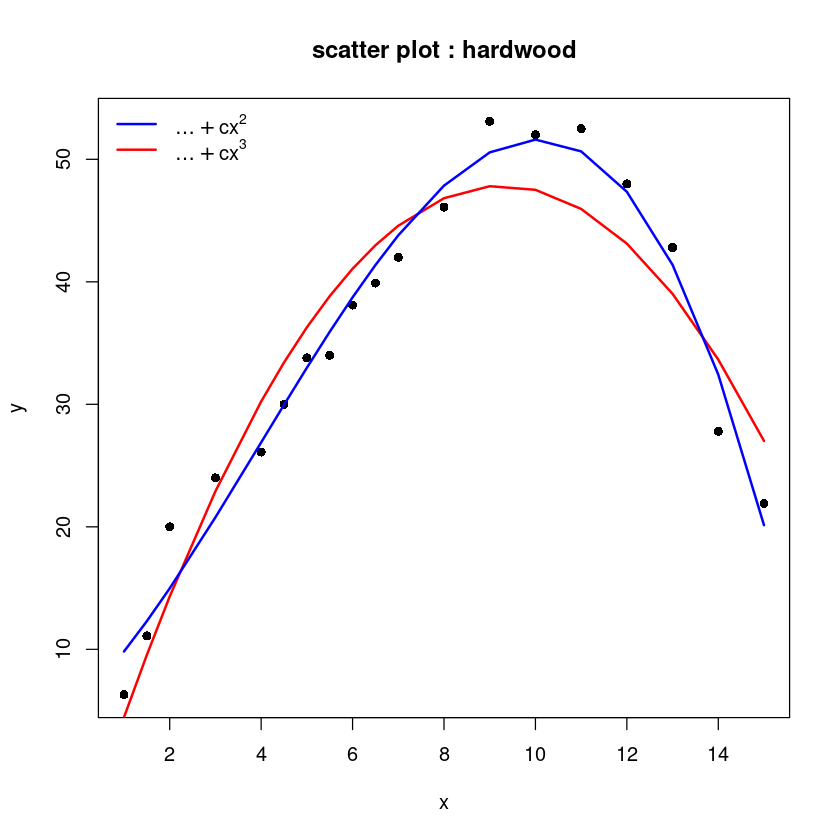

In [32]:
par(mfrow=c(1,1))
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
lines(hard$x, fitted(hard_fit_c_2),col='red', lwd=2)
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3), hard)),col='blue', lwd=2) 
legend("topleft",c(expression(ldots+cx^2), 
            expression(ldots+cx^3)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")                  

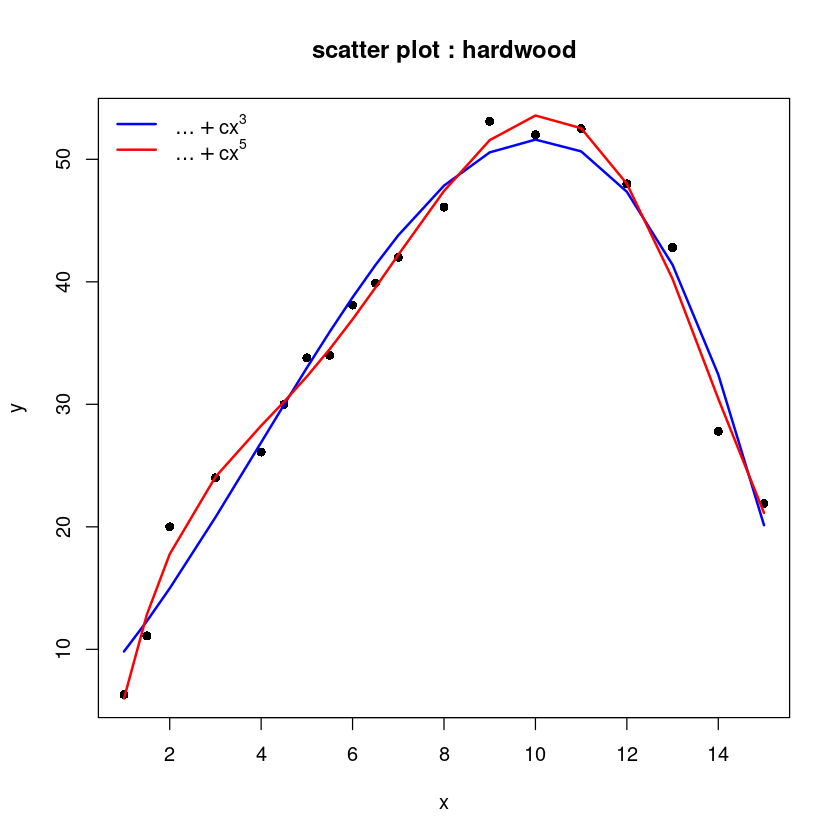

In [33]:
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3), hard)),col='blue', lwd=2)
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5), hard)),col='red', lwd=2) 
legend("topleft", c(expression(ldots+cx^3), 
                    expression(ldots+cx^5)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")                                                                                       

-   5승 들어가면 잔차가 더 작아진다. -\> 과적합

In [34]:
summary(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5), hard))

# 실습2

In [9]:
set.seed(12)
x <- seq(1,2,0.05) # 21개의 데이터
x2 <- x^2
y <- 3*x+1+4*x2 + rnorm(21)

-   $y=1+3x+4x^2+N(0,1)$

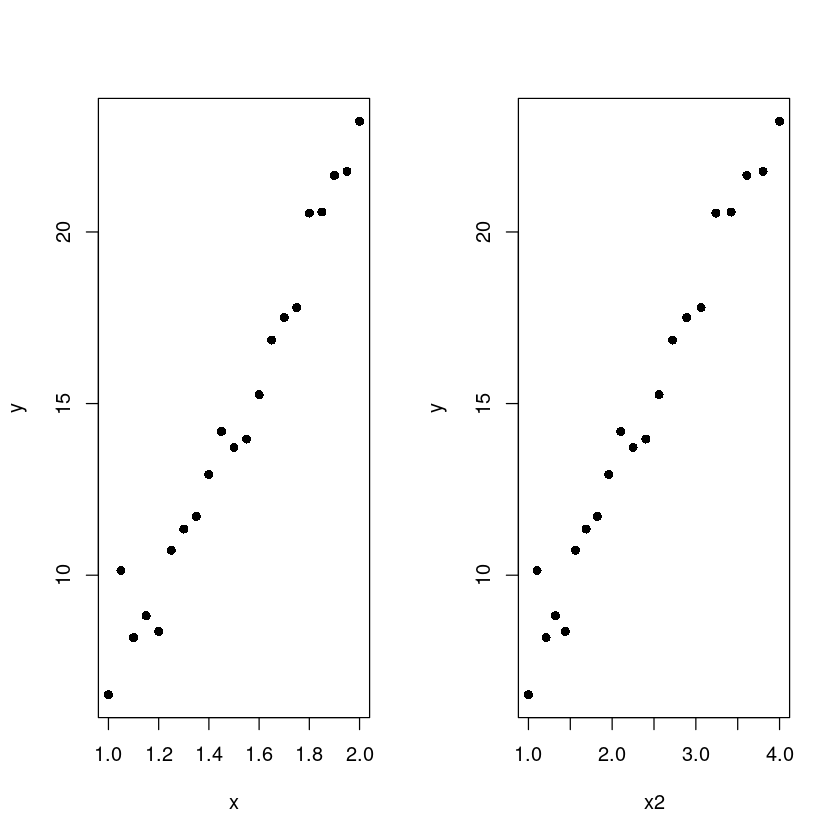

In [8]:
par(mfrow=c(1,2)) 
plot(x, y, pch=16) 
plot(x2,y, pch=16)

-   1~2까지의 X의 범위 일부분

-   커브는 보이지 않고 직선 형태로만 보인다.

In [10]:
cor(x,x2)

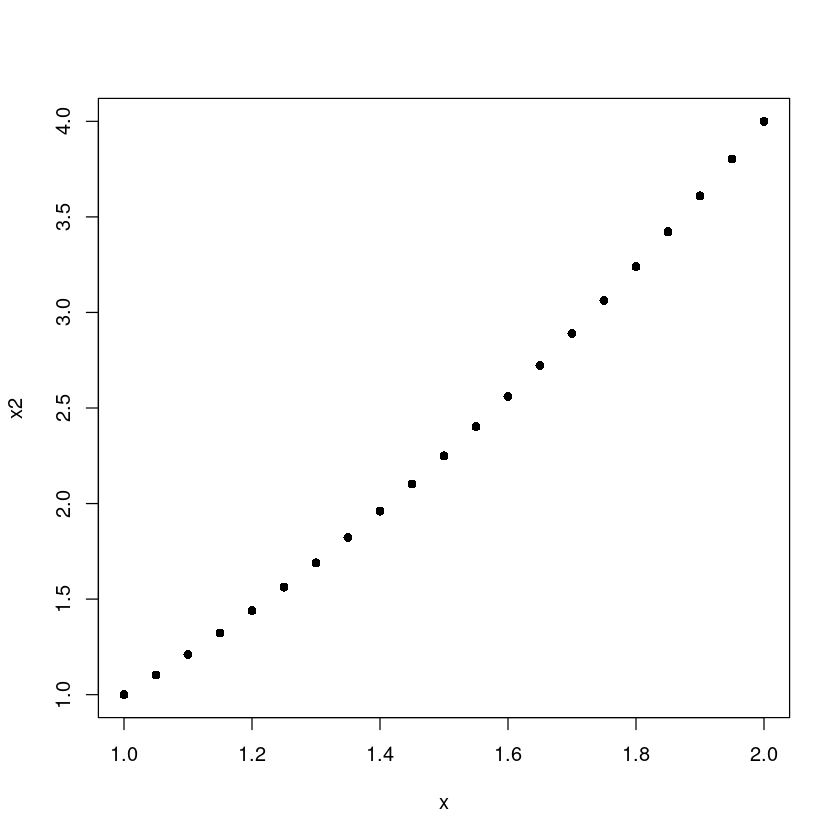

In [11]:
plot(x,x2,pch=16)

In [12]:
m <- lm(y~x+x2)
summary(m)

-   $y=\beta_0+\beta_1x+\beta_2x^2+\epsilon$

-   모형자체는 유의하게 나오지만 x와 계수는 유의하지 않고, x2는 적게
    나옴 -\> 다중공산성

In [13]:
cx <- x-mean(x)
cx2 <- cx^2

In [14]:
cor(cx, cx2)

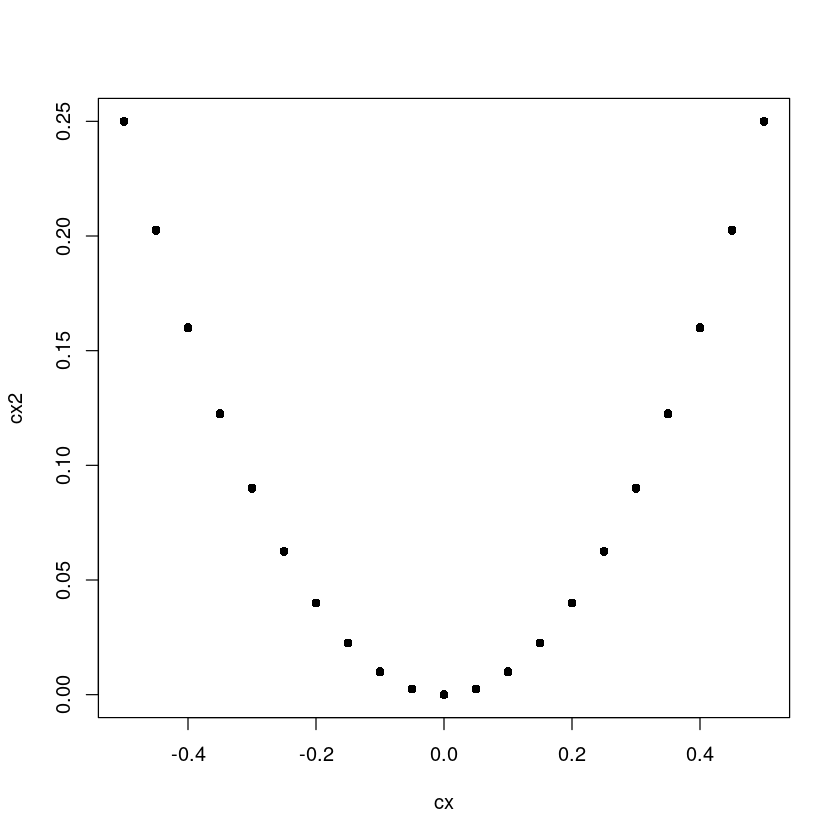

In [15]:
plot(cx,cx2, pch=16)

In [16]:
m2 <- lm(y~cx+I(cx^2))
summary(m2)

$y=\beta_0+\beta_1(x-\bar x) + \beta_2 (x-\bar x)^2 + \epsilon$

$\because x- \bar x = cx$

$lm(y$~$x+x$^$2)$ 이건 성립이 안된다.

$lm(y$~ $x+I(x$^$2))$이렇게 써야해

$\hat \beta_2$는 위의 m1모형의 값과 같다.

$\hat \beta_1$과 $\hat \beta_0$은 m1모형의 값과 아주 다르다.

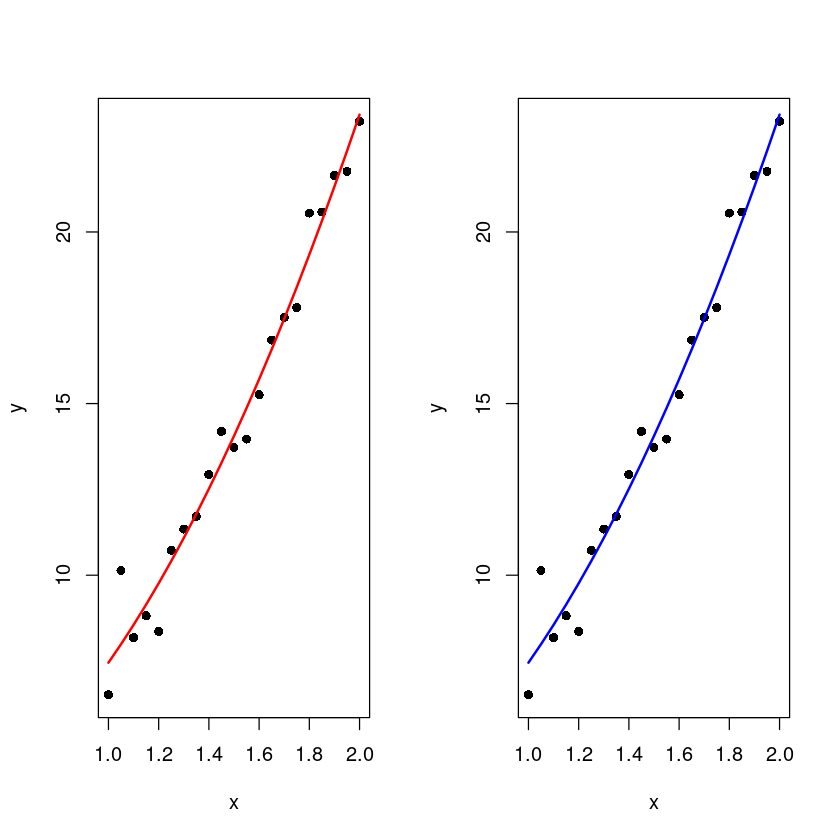

In [18]:
par(mfrow=c(1,2))
plot(x,y, pch=16)
lines(x, fitted(m), col='red', lwd=2) 
plot(x,y, pch=16)
lines(x, fitted(m2), col='blue', lwd=2)

$y=\beta_0+\beta_1(x_1 - \bar x) +\epsilon$

$= \beta_0+\beta_1x_1 - \beta_1 \bar x + \epsilon$

$=(\beta_0 - \beta_1 \bar x) +\beta_1 x_1 +\epsilon$

$= \beta^`_0 + \beta_1x_1 + \epsilon$

$y=\beta_0+\beta_1(x-\bar x)+\beta_2(x-\bar x)^2$

$=\beta_0+\beta_1x - \beta_1 \bar x + \beta_2 x^2 - 2x \bar x \beta + \beta_2 (\bar x)^2$

$=((\beta_0-\beta_1 \bar x) + \beta_2 (\bar x)^2)+ (\beta_1 - 2 \bar x \beta_2) x + \beta_2 x^2$

-   센터링을 하게 되면 회귀계수들의 다중공산성을 조금 제거할 수 있다.